Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 139ms/step - acc: 0.5541 - loss: 0.6802 - val_acc: 0.7144 - val_loss: 0.5633
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - acc: 0.8007 - loss: 0.4519 - val_acc: 0.8098 - val_loss: 0.4221
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - acc: 0.8654 - loss: 0.3266 - val_acc: 0.8488 - val_loss: 0.3661
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - acc: 0.8913 - loss: 0.2652 - val_acc: 0.7848 - val_loss: 0.5228
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - acc: 0.9249 - loss: 0.1989 - val_acc: 0.7918 - val_loss: 0.5021
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - acc: 0.9576 - loss: 0.1213 - val_acc: 0.8300 - val_loss: 0.5012
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - acc: 0.9750 - loss: 0.0810 - val_acc: 0.8276 - val_loss: 0.5044
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - acc: 0.9860 - loss: 0.0460 - val_acc: 0.8354 - val_loss: 0.5434
Epoch 9/10
157/157 ━━━━━━━━━━━━━

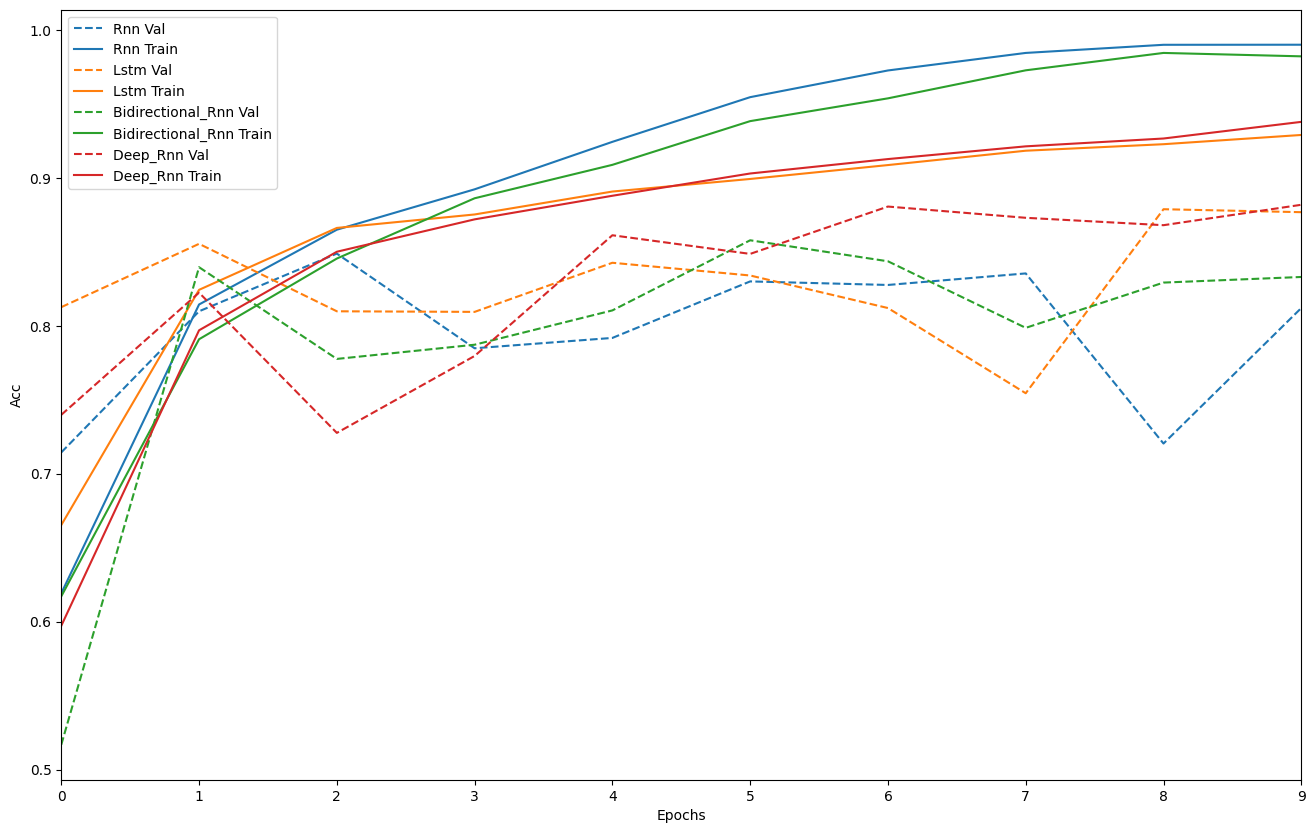

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
import matplotlib.pyplot as plt

max_features = 10000  # Визначаємо максимальну кількість слів
maxlen = 500  # Визначаємо максимальну довжину рецензій

# Завантажуємо дані IMDB
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Подовжуємо або урізаємо рецензії до заданої довжини
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

# Функції побудови моделей
def build_rnn_model():
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(SimpleRNN(32))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_bidirectional_rnn_model():
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(Bidirectional(SimpleRNN(32)))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_deep_rnn_model():
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Створення моделей та їх компіляція
modelRnn = build_rnn_model()
modelLstm = build_lstm_model()
modelBDRRnn = build_bidirectional_rnn_model()
modelDeepRnn = build_deep_rnn_model()

modelRnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
modelLstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
modelBDRRnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
modelDeepRnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Навчання моделей
rnn_history = modelRnn.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
lstm_history = modelLstm.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
bidirectional_rnn_history = modelBDRRnn.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
deep_rnn_history = modelDeepRnn.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Оцінка моделей
rnn_test_loss, rnn_test_acc = modelRnn.evaluate(input_test, y_test)
lstm_test_loss, lstm_test_acc = modelLstm.evaluate(input_test, y_test)
bidirectional_rnn_test_loss, bidirectional_rnn_test_acc = modelBDRRnn.evaluate(input_test, y_test)
deep_rnn_test_loss, deep_rnn_test_acc = modelDeepRnn.evaluate(input_test, y_test)


print(f"Model\t\t\tTest Accuracy\tTest Loss")
print(f"RNN\t\t\t{rnn_test_acc:.4f}\t\t{rnn_test_loss:.4f}")
print(f"LSTM\t\t\t{lstm_test_acc:.4f}\t\t{lstm_test_loss:.4f}")
print(f"Bidirectional RNN\t{bidirectional_rnn_test_acc:.4f}\t\t{bidirectional_rnn_test_loss:.4f}")
print(f"Deep RNN\t\t{deep_rnn_test_acc:.4f}\t\t{deep_rnn_test_loss:.4f}")



import matplotlib.pyplot as plt

def plot_history(histories, key='acc'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

plot_history([
    ('rnn', rnn_history),
    ('lstm', lstm_history),
    ('bidirectional_rnn', bidirectional_rnn_history),
    ('deep_rnn', deep_rnn_history)
])



Висновок:

1. LSTM (Long Short-Term Memory) має найвищу точність прогнозу: Ця мережа показала найкращу точність (Test Accuracy) на тестовому наборі даних з результатом 0.8784, що указує на її ефективність для задач з послідовностями, які мають важливі взаємозв'язки на великій відстані. LSTM здатні зберігати інформацію на довгий період часу та уникнути проблем зникнення градієнту. Це робить її досить ефективною для задач обробки природної мови, як то аналіз настроїв.

2. Проста RNN (Recurrent Neural Network) має найнижчу точність: З результатом точності 0.8120 RNN залишається за іншими моделями. Це може бути пов'язано з проблемою зникнення та/або вибуху градієнтів, яка стає важливою при роботі з довшими послідовностями даних.

3. Двостороння RNN (Bidirectional RNN): ця мережа, яка тренується одночасно в прямому та зворотному напрямках, демонструє покращену точність (0.8284) порівняно зі звичайною RNN. Це свідчить про те, що двосторонній підхід може бути корисним, але він все ще поступається LSTM та глибокій RNN моделі.

4. Глибока RNN (Deep RNN): Має майже таку саму високу точність, як LSTM (0.8774), що підтверджує ефективність використання декількох шарів LSTM для вилучення рівнів абстракції із даних послідовностей.

У підсумку, серед порівнювальних моделей, LSTM та глибока RNN показують найкращі результати, що робить їх переважними варіантами для складних завдань обробки послідовностей, які включають довготривалі залежності. Однак, треба враховувати, що більш складні моделі, як-от LSTM та глибокі RNN, зазвичай вимагають більше обчислювальних ресурсів для тренування і можуть бути більш схильними до перенавчання, особливо з меншими наборами даних.